In [1]:
import maxbc
import pysal as ps
from scipy.spatial import distance as d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = ps.pdio.read_files(ps.examples.get_path('columbus.dbf'))

In [3]:
chain = df['geometry'][0]

In [4]:
ptset = [pt for part in chain.parts for pt in part[:-1]]

In [5]:
ptset

[(8.624129295349121, 14.236980438232422),
 (8.559700012207031, 14.742449760437012),
 (8.809452056884766, 14.734430313110352),
 (8.808412551879883, 14.636520385742188),
 (8.919304847717285, 14.638500213623047),
 (9.087138175964355, 14.63049030303955),
 (9.09996509552002, 14.244830131530762),
 (9.015047073364258, 14.241840362548828),
 (9.008951187133789, 13.995059967041016),
 (8.818140029907227, 14.002050399780273),
 (8.653305053710938, 14.008090019226074),
 (8.642902374267578, 14.089710235595703),
 (8.63259220123291, 14.1705904006958),
 (8.625825881958008, 14.22367000579834)]

In [6]:
center, radius = maxbc.maximum_contained_circle(ptset)

maxbc.py:11: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  ivoronoi = voronoi.vertices[within]


0.0

In [7]:
from shapely import geometry as geom

In [8]:
circ = geom.Point(center).buffer(radius)

In [9]:
radius

0.0

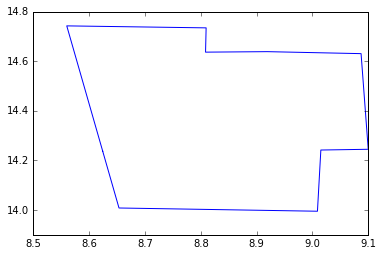

In [10]:
mbc = plt.Circle(center, radius, alpha = .1)
plt.plot([pt[0] for pt in chain.parts[0]], [pt[1] for pt in chain.parts[0]])
ax = plt.gca()
ax.add_artist(mbc)
plt.show()

In [11]:
vo = maxbc.Voronoi(ptset)
within = [chain.contains_point(pt) for pt in vo.vertices]
ivo_verts = vo.vertices[np.asarray(within)]

In [12]:
import scipy.spatial as spat

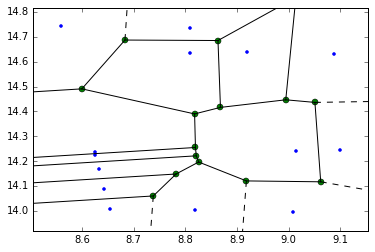

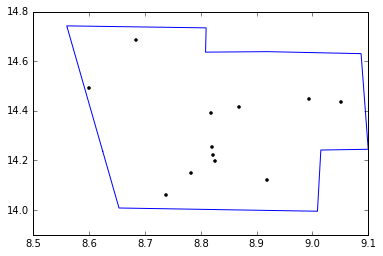

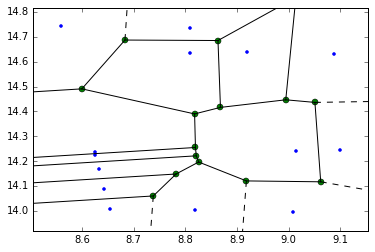

In [13]:
plt.plot([pt[0] for pt in chain.parts[0]], [pt[1] for pt in chain.parts[0]])
plt.plot(ivo_verts[:,0], ivo_verts[:,1], 'k.')
spat.voronoi_plot_2d(vo)